# **Linear Regression with Python Scikit Learn**
In this task, Python Scikit-Learn library for machine learning is used to implement regression functions. Here simple linear regression is implemented involing two variables.

In this task, prediction of percentage of marks that a student is expected to score based on the number of hours they studied.

In [2]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
#Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(url)
print("Data imported from url successfully")
student_data

Data imported from url successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Below is the plot of the data points on 2-D graph to visualize the dataset and see any pattern in the data.

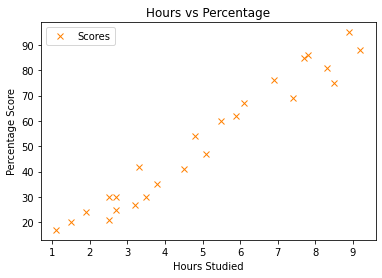

In [8]:
#Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='x',color=[1,0.5,0])
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

#**Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = student_data.iloc[:, :-1].values
Y = student_data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

#**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

print("Training done!")

Training done!


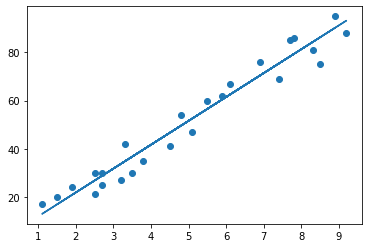

In [14]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

#Plotting for the test data
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

#**Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
#Testing data 
print(X_test)
#Predicting the scores
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
diff = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
diff

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#Testing other data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Hours = [[9.25]]
Predicted Score = 93.69173248737539


##**Evaluating the model**

The final step is to evaluate the performance of algorithm. The mean square error is choosen here.

In [20]:
from sklearn import metrics
print("Mean Absolute Error = ",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error =  4.183859899002982
